In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

En este caso, haremos detección de spam. El dataset lo hemos obtenido de: https://www.kaggle.com/ozlerhakan/spam-or-not-spam-dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/4to año/2do Cuatrimestre/TFG/Materiales/detección de spam/data/spam_or_not_spam.csv")

**Procesamos el texto**

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() # Stemmer se usa para dar la raíz de las palabras.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []
for row in range(0, len(dataset)):
  text = re.sub('[^a-zA-Z]', ' ',str(dataset['email'][row])) 
  text = text.lower() 
  text = text.split() 
  text = [ps.stem(word) for word in text if not word in stopwords.words('english')] 
  text = ' '.join(text) 
  corpus.append(text) 

In [ ]:
predictor = corpus
target = dataset.label

In [ ]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictor, target, test_size = 0.20)

In [ ]:
# Data for training
pos, count = np.unique(tar_train,return_counts=True)
for i, p in enumerate(pos):
    print(p,"=",count[i])

0 = 2002
1 = 398


In [ ]:
# Data for testing
pos, count = np.unique(tar_test,return_counts=True)
for i, p in enumerate(pos):
    print(p,"=",count[i])

0 = 498
1 = 102


**Naive Bayes**

In [ ]:
naive_bayes = Pipeline([('cv', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('nb', MultinomialNB())])

Training Accuracy : 0.9141666666666667
Testing Accuracy : 0.8933333333333333

CONFUSION MATRIX


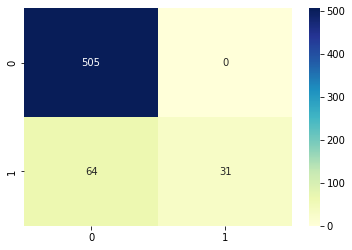

In [ ]:
naive_bayes.fit(pred_train, tar_train)

print('Training Accuracy :',naive_bayes.score(pred_train, tar_train))
print('Testing Accuracy :',naive_bayes.score(pred_test, tar_test))

predictions = naive_bayes.predict(pred_test)

# creating confusing matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(tar_test,predictions)


print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

# 0 -> ham
# 1 -> spam

In [ ]:
naive_bayes = Pipeline([('cv', CountVectorizer()),
                        ('nb', MultinomialNB())])

Training Accuracy : 0.99625
Testing Accuracy : 0.9866666666666667

CONFUSION MATRIX


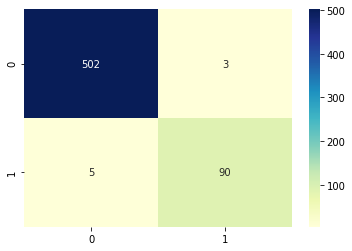

In [ ]:
naive_bayes.fit(pred_train, tar_train)

print('Training Accuracy :',naive_bayes.score(pred_train, tar_train))
print('Testing Accuracy :',naive_bayes.score(pred_test, tar_test))

predictions = naive_bayes.predict(pred_test)

# creating confusing matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(tar_test,predictions)


print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**Random Forest**

In [ ]:
random_forest = Pipeline([('cv', CountVectorizer()),
                          ('tfidf', TfidfTransformer()),
                          ('rf', RandomForestClassifier())])

Training Accuracy : 1.0
Testing Accuracy : 0.975

CONFUSION MATRIX


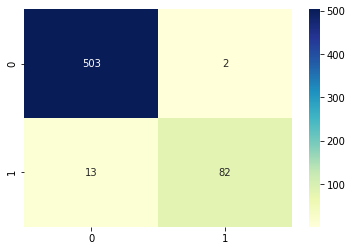

In [ ]:
random_forest.fit(pred_train, tar_train)

print('Training Accuracy :',random_forest.score(pred_train, tar_train))
print('Testing Accuracy :',random_forest.score(pred_test, tar_test))

#Predecimos para los valores del grupo Test
predictions = random_forest.predict(pred_test)

# creating confusing matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(tar_test,predictions)


print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Training Accuracy : 1.0
Testing Accuracy : 0.9733333333333334

CONFUSION MATRIX


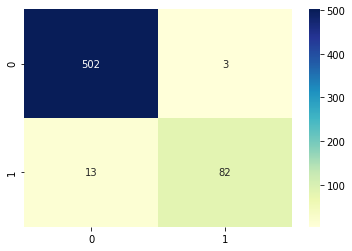

In [ ]:
random_forest = Pipeline([('cv', CountVectorizer()),
                          ('rf', RandomForestClassifier())])

random_forest.fit(pred_train, tar_train)

print('Training Accuracy :',random_forest.score(pred_train, tar_train))

#Predecimos para los valores del grupo Test
predictions = random_forest.predict(pred_test)

# creating confusing matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(tar_test,predictions)


print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**REGRESIÓN LOGÍSTICA**

In [ ]:
log_reg = Pipeline([('cv', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('lr', LogisticRegression())])

Training Accuracy : 0.9758333333333333
Testing Accuracy : 0.9616666666666667

CONFUSION MATRIX


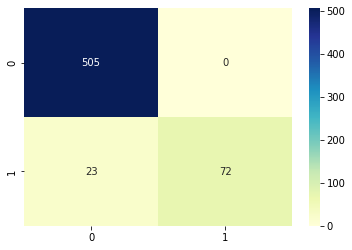

In [ ]:
log_reg.fit(pred_train, tar_train)

print('Training Accuracy :',log_reg.score(pred_train, tar_train))

#Predecimos para los valores del grupo Test
predictions = log_reg.predict(pred_test)

# creating confusing matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(tar_test,predictions)


print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Training Accuracy : 0.9983333333333333
Testing Accuracy : 0.9883333333333333

CONFUSION MATRIX


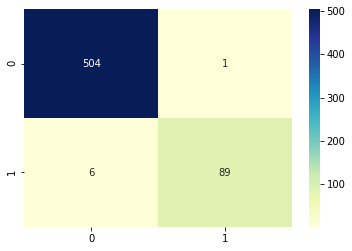

In [ ]:
log_reg = Pipeline([('cv', CountVectorizer()),
                    ('lr', LogisticRegression())])

log_reg.fit(pred_train, tar_train)

print('Training Accuracy :',log_reg.score(pred_train, tar_train))

#Predecimos para los valores del grupo Test
predictions = log_reg.predict(pred_test)

# creating confusing matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(tar_test,predictions)


print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")